### Using Decision Tree for Loan Default Prediction

### What is our objective ?
* To reliably predict wether a person's loan payment will be defaulted based on features such as Salary, Account Balance etc.

### Getting to know the dataset!
LoanDefault dataset contains historic data for loan defaultees, along with their associated financial background, it has the following features.
* Employed - Employment status of the borrower, (1 - Employed | 0 - Unemployed).
* Bank Balance - Account Balance of the borrower at the time of repayment / default.
* Annual Salary - Per year income of the borrower at the time of repayment / default.
* Default - Target variable, indicated if the borrower repayed the loaned amount within the stipulated time period, (1 - Defaulted | 0 - Re-Paid).

### Approach
* This is an trivial example for dataset containing class imbalance, considering most of the people will be repaying their loan without default.
* So, we have to explore our data to check for imbalance, handle it using various techniques.
* Explore the correlation between various features in the dataset
* Split the preprocessed dataset into train and test sets respectively.
* Train a DecisionTree (Classifier) using mlpack.
* Finally we'll predict on the test set and using various evaluation metrics such as Accuracy, F1-Score, ROC AUC to judge the performance of our model on unseen data.

#### NOTE: In this example we'll be implementing 4 parts i.e modelling on imbalanced, oversampled, SMOTE & undersampled data respectively.

In [5]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlpack

In [6]:
%matplotlib inline
sns.set(color_codes=True)

### Load the data

In [7]:
loanData = pd.read_csv("LoanDefault.csv")

### Explore the data

In [13]:
loanData.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [14]:
# Examine the shape of the dataframe.
print(f"# of rows: {loanData.shape[0]}")
print(f"# of cols: {loanData.shape[1]}")

# of rows: 10000
# of cols: 4


In [15]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


From the above summary statistic we can infer there is no missing or categorical variables to handle in our dataset.

In [41]:
## Check the percentage of missing values
(loanData.isnull().sum() / len(loanData)) * 100

Employed         0.0
Bank Balance     0.0
Annual Salary    0.0
Defaulted?       0.0
dtype: float64

### Part 1 - Modelling using Imbalanced dataset.

### Visualize data distribution

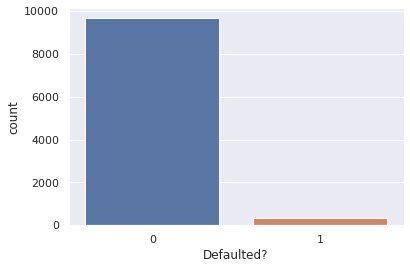

In [18]:
# Visualize the distibution of target classes.
sns.countplot(x="Defaulted?", data=loanData)
plt.show()

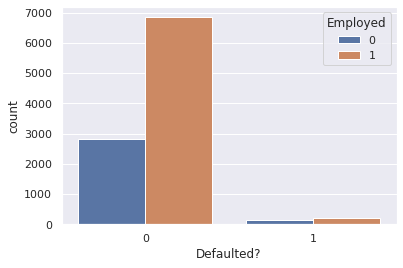

In [19]:
# Visualize the distibution of target classes.
sns.countplot(x="Defaulted?", hue="Employed", data=loanData)
plt.show()

### Visualize Correlation

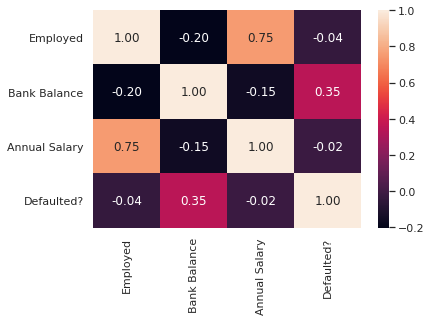

In [20]:
sns.heatmap(loanData.corr(), annot=True, fmt=".2f")
plt.show()

In [22]:
featureNames = ["Employed", "Bank Balance", "Annual Salary"]

In [25]:
features = loanData[featureNames]
target = loanData["Defaulted?"]

### Train Test Split

In [26]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = target.iloc[train_idxs[:split]].values
ytrain = target.iloc[train_idxs[split:]].values

In [9]:
def StandardScaler(data):
    for col in range(data.shape[1]):
        data[:, col] = (data[:, col] - data[:,col].mean()) / (data[:,col].std())
    return data

In [29]:
# Normalize Features.
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

### Training Decision Tree model

In [30]:
# Create and train Random Forest model with 100 trees.
output = mlpack.decision_tree(training=Xtrain, labels=ytrain, print_training_accuracy=True)

In [31]:
rf = output["output_model"]

In [32]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.decision_tree(input_model=rf, test=Xtest)

In [33]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

In [11]:
from sklearn.metrics import *

In [10]:
def plot_rocAUC(fper, tper):
    plt.plot(fper, tper, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

### Evaluation metrics

* True Positive - The actual value was true & the model predicted true.
* False Positive - The actual value was false & the model predicted true, Type I error.
* True Negative - The actual value was false & the model predicted false.
* False Negative - The actual value was true & the model predicted false, Type II error.

`Accuracy`: is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

$$Accuracy = \frac{True_{positive} + True_{negative}}{True_{positive} + True_{negative} + False_{positive} + False_{negative}}$$

`Precision`: is calculated as the ratio between the number of positive samples correctly classified to the total number of samples classified as Positive. The precision measures the model's accuracy in classifying a sample as positive.

$$Precision = \frac{True_{positive}}{True_{positive} + False_{positive}}$$

`Recall`: is calulated as the ratio between the number of positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected.

$$Recall = \frac{True_{positive}}{True_{positive} + False_{negative}}$$

* The decision of whether to use precision or recall depends on the type of problem begin solved.
* If the goal is to detect all positive samples then use recall.
* Use precision if the problem is sensitive to classifying a sample as Positive in general.

* ROC graph has the True Positive rate on the y axis and the False Positive rate on the x axis.
* ROC Area under the curve in the graph is the primary metric to determine if the classifier is doing well, the higher the value the higher the model performance.

Accuracy: 0.9704
ROC AUC: 0.6100206611570249
Cohen's Kappa: 0.31532198371576614
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2420
           1       0.60      0.23      0.33        80

    accuracy                           0.97      2500
   macro avg       0.79      0.61      0.66      2500
weighted avg       0.96      0.97      0.96      2500



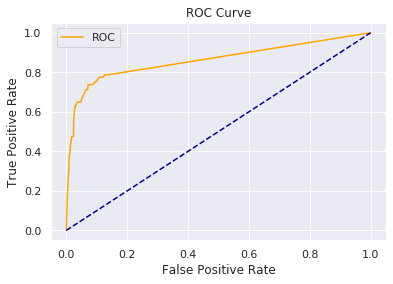

In [37]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)

### Part 2 - Modelling using Random Oversampling

In [20]:
def Resample(data, replace, n_samples, random_state = 123):
    np.random.seed(random_state)
    indices = data.index
    random_sampled_indices = np.random.choice(indices,
                                              size=n_samples,
                                              replace=replace)
    return data.loc[random_sampled_indices]

In [21]:
negClass = loanData[loanData["Defaulted?"] == 0]
posClass = loanData[loanData["Defaulted?"] == 1]
posOverSampled = Resample(posClass, replace=True, n_samples=len(negClass))
overSampled = pd.concat([negClass, posOverSampled])

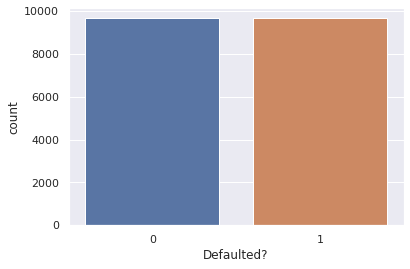

In [22]:
# Visualize the distibution of target classes.
sns.countplot(x="Defaulted?", data=overSampled)
plt.show()

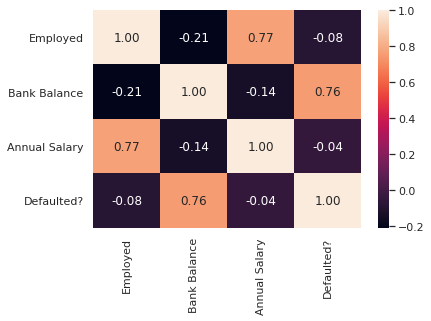

In [23]:
sns.heatmap(overSampled.corr(), annot=True, fmt=".2f")
plt.show()

In [24]:
featureNames = ["Employed", "Bank Balance", "Annual Salary"]

In [25]:
features = overSampled[featureNames]
target = overSampled["Defaulted?"]

In [26]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = target.iloc[train_idxs[:split]].values
ytrain = target.iloc[train_idxs[split:]].values

In [27]:
# Normalize Features.
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

In [28]:
# Create and train Random Forest model with 100 trees.
output = mlpack.decision_tree(training=Xtrain, labels=ytrain, print_training_accuracy=True)

In [29]:
rf = output["output_model"]

In [30]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.decision_tree(input_model=rf, test=Xtest)

In [31]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Accuracy: 0.9048210221394579
ROC AUC: 0.9048407006083863
Cohen's Kappa: 0.8096471539544721
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2407
           1       0.91      0.90      0.90      2426

    accuracy                           0.90      4833
   macro avg       0.90      0.90      0.90      4833
weighted avg       0.90      0.90      0.90      4833



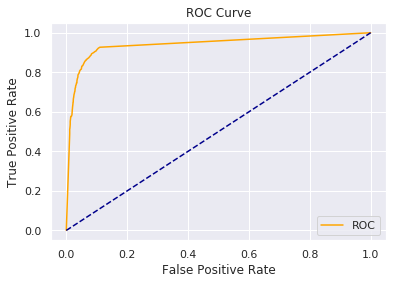

In [32]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)

### Part 3 - Modelling using Synthetic Minority Oversampling Technique

In [54]:
smoteData = loanData.copy()

In [58]:
featureNames = ["Employed", "Bank Balance", "Annual Salary", "Defaulted?"]
features = loanData[featureNames]

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
os = SMOTE()
features, targets = os.fit_resample(features.iloc[:, :-1], features.iloc[:,-1])

In [61]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = targets.iloc[train_idxs[:split]].values
ytrain = targets.iloc[train_idxs[split:]].values

In [62]:
# Normalize Features.
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

In [63]:
# Create and train Random Forest model with 100 trees.
output = mlpack.decision_tree(training=Xtrain, labels=ytrain, print_training_accuracy=True)

In [64]:
rf = output["output_model"]

In [65]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.decision_tree(input_model=rf, test=Xtest)

In [66]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Accuracy: 0.8975791433891993
ROC AUC: 0.8973284690689453
Cohen's Kappa: 0.7949977544600383
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2371
           1       0.89      0.91      0.90      2462

    accuracy                           0.90      4833
   macro avg       0.90      0.90      0.90      4833
weighted avg       0.90      0.90      0.90      4833



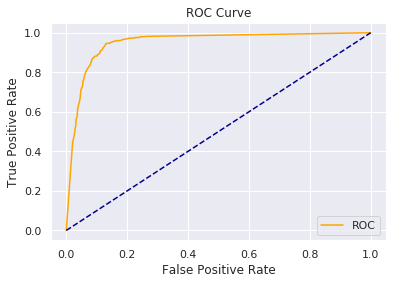

In [67]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)

### Part 4 - Modelling using Random Undersampling

Since the size of the data set is quite small, undersampling of majority class would not make much sense here. But still we are going forward with this part to get a sense of how our model performs on less amount of data and it's impact on the learning.

In [15]:
negClass = loanData[loanData["Defaulted?"] == 0]
posClass = loanData[loanData["Defaulted?"] == 1]
negUnderSampled = Resample(negClass, replace=True, n_samples=len(posClass))
underSampled = pd.concat([negUnderSampled, posClass])

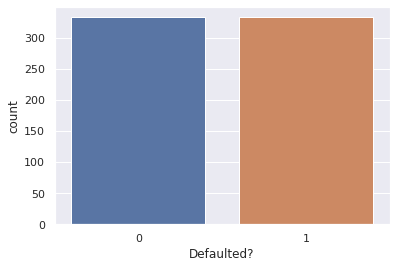

In [16]:
# Visualize the distibution of target classes.
sns.countplot(x="Defaulted?", data=underSampled)
plt.show()

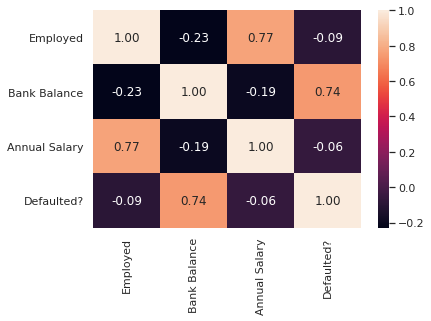

In [17]:
sns.heatmap(underSampled.corr(), annot=True, fmt=".2f")
plt.show()

In [19]:
featureNames = ["Employed", "Bank Balance", "Annual Salary"]

In [33]:
features = underSampled[featureNames]
target = underSampled["Defaulted?"]

In [34]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = target.iloc[train_idxs[:split]].values
ytrain = target.iloc[train_idxs[split:]].values

In [35]:
# Normalize Features.
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

In [36]:
# Create and train Random Forest model with 100 trees.
output = mlpack.decision_tree(training=Xtrain, labels=ytrain, print_training_accuracy=True)

In [37]:
rf = output["output_model"]

In [38]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.decision_tree(input_model=rf, test=Xtest)

In [39]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Accuracy: 0.8855421686746988
ROC AUC: 0.8855421686746989
Cohen's Kappa: 0.7710843373493976
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        83
           1       0.87      0.90      0.89        83

    accuracy                           0.89       166
   macro avg       0.89      0.89      0.89       166
weighted avg       0.89      0.89      0.89       166



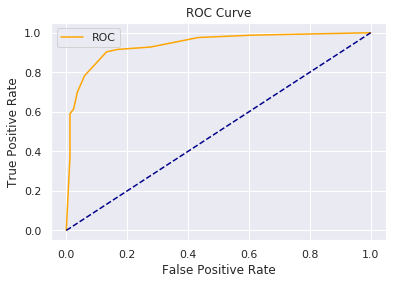

In [40]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)